In [1]:
# Import Libraries
# =========

import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn.linear_model import ElasticNet

In [2]:
# Control random
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Reading the dataset

data = pd.read_csv("data_10000_textLabel.csv", encoding = "ISO-8859-1")
data_full = pd.read_csv("data-final_textLabel.csv", encoding = "ISO-8859-1")
data_full = data.dropna()

In [4]:
data_full.head()

,I am the life of the party,I don't talk a lot,I feel comfortable around people,I keep in the background,I start conversations,I have little to say,I talk to a lot of different people at parties,I don't like to draw attention to myself,I don't mind being the center of attention,I am quiet around strangers
0,4,1,5,2,5,1,5,2,4,1
1,3,5,3,4,3,3,2,5,1,5
2,2,3,4,4,3,2,1,3,2,5
3,2,2,2,3,4,2,2,4,1,4
4,3,3,3,3,5,3,3,5,3,4


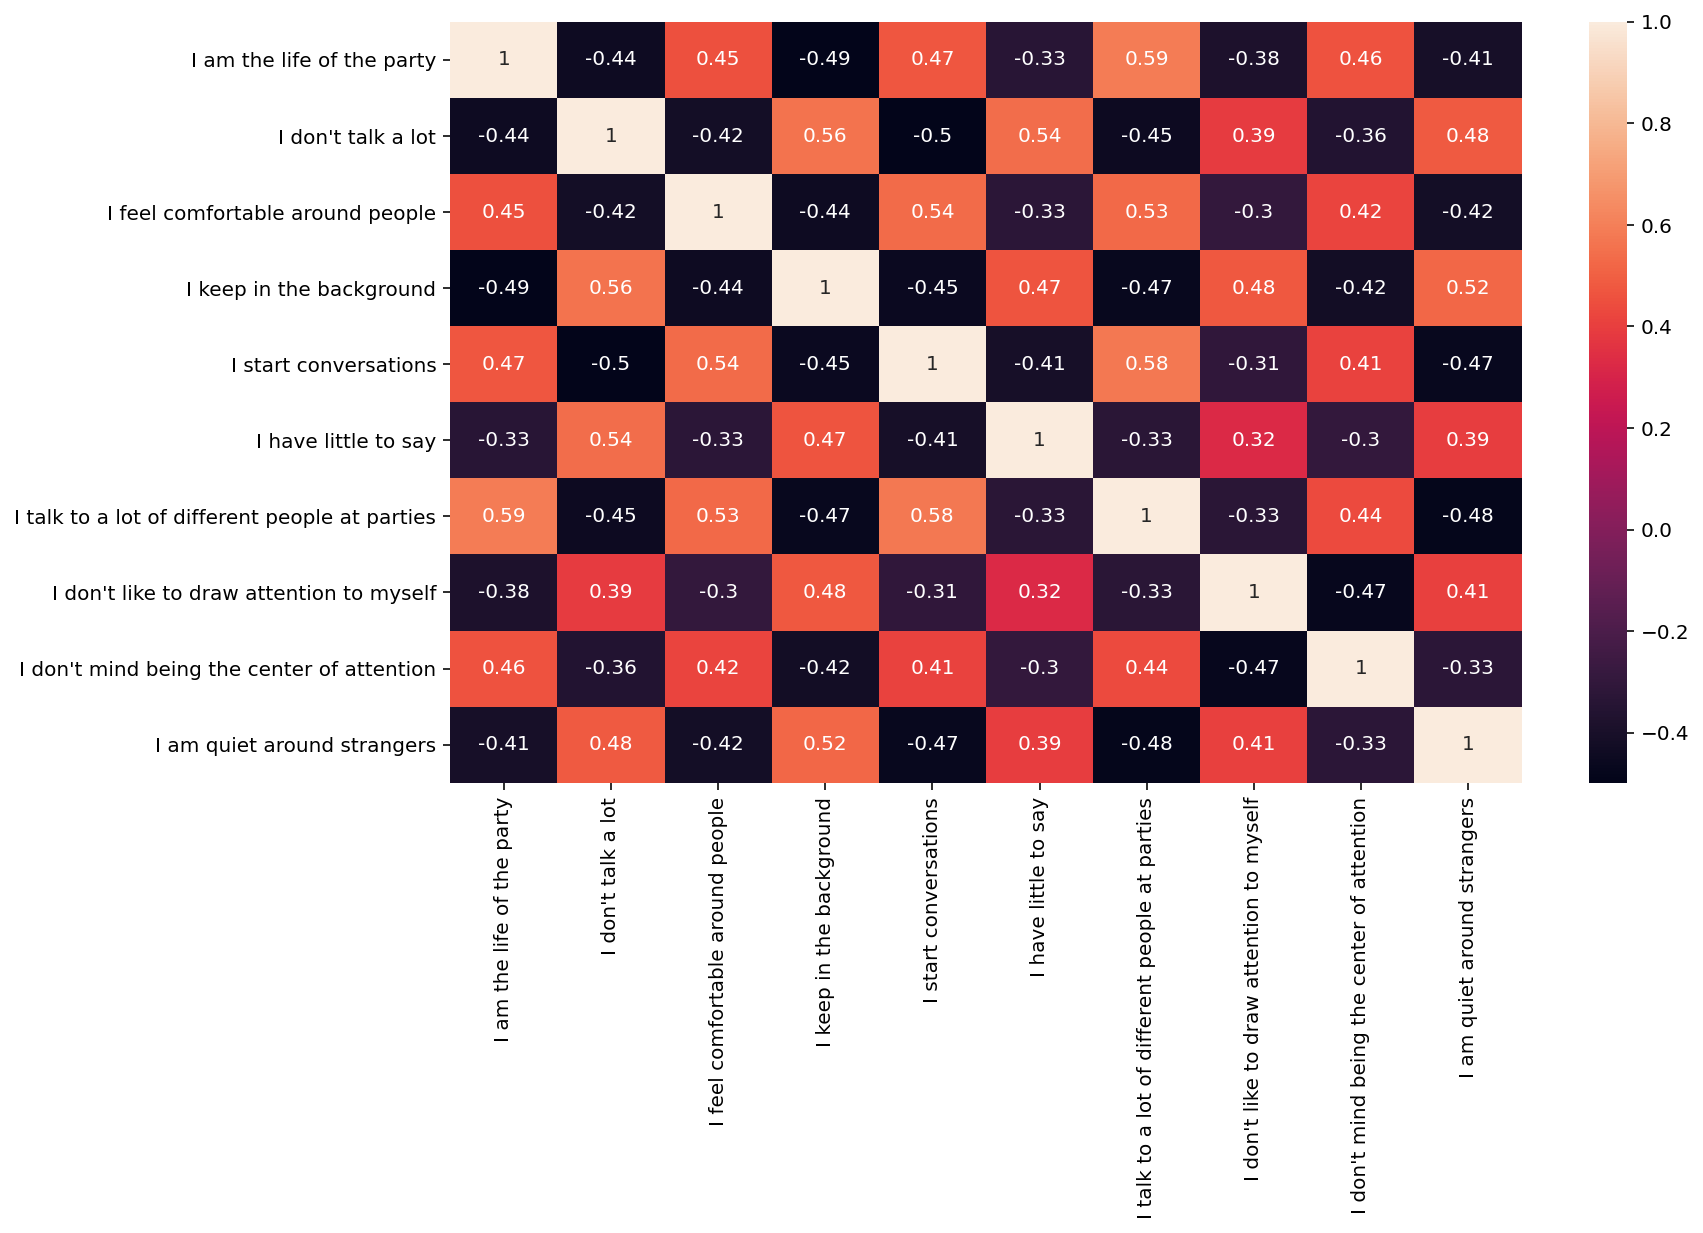

In [50]:
#target_data = data.drop(['I feel comfortable around people'], axis=1)
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

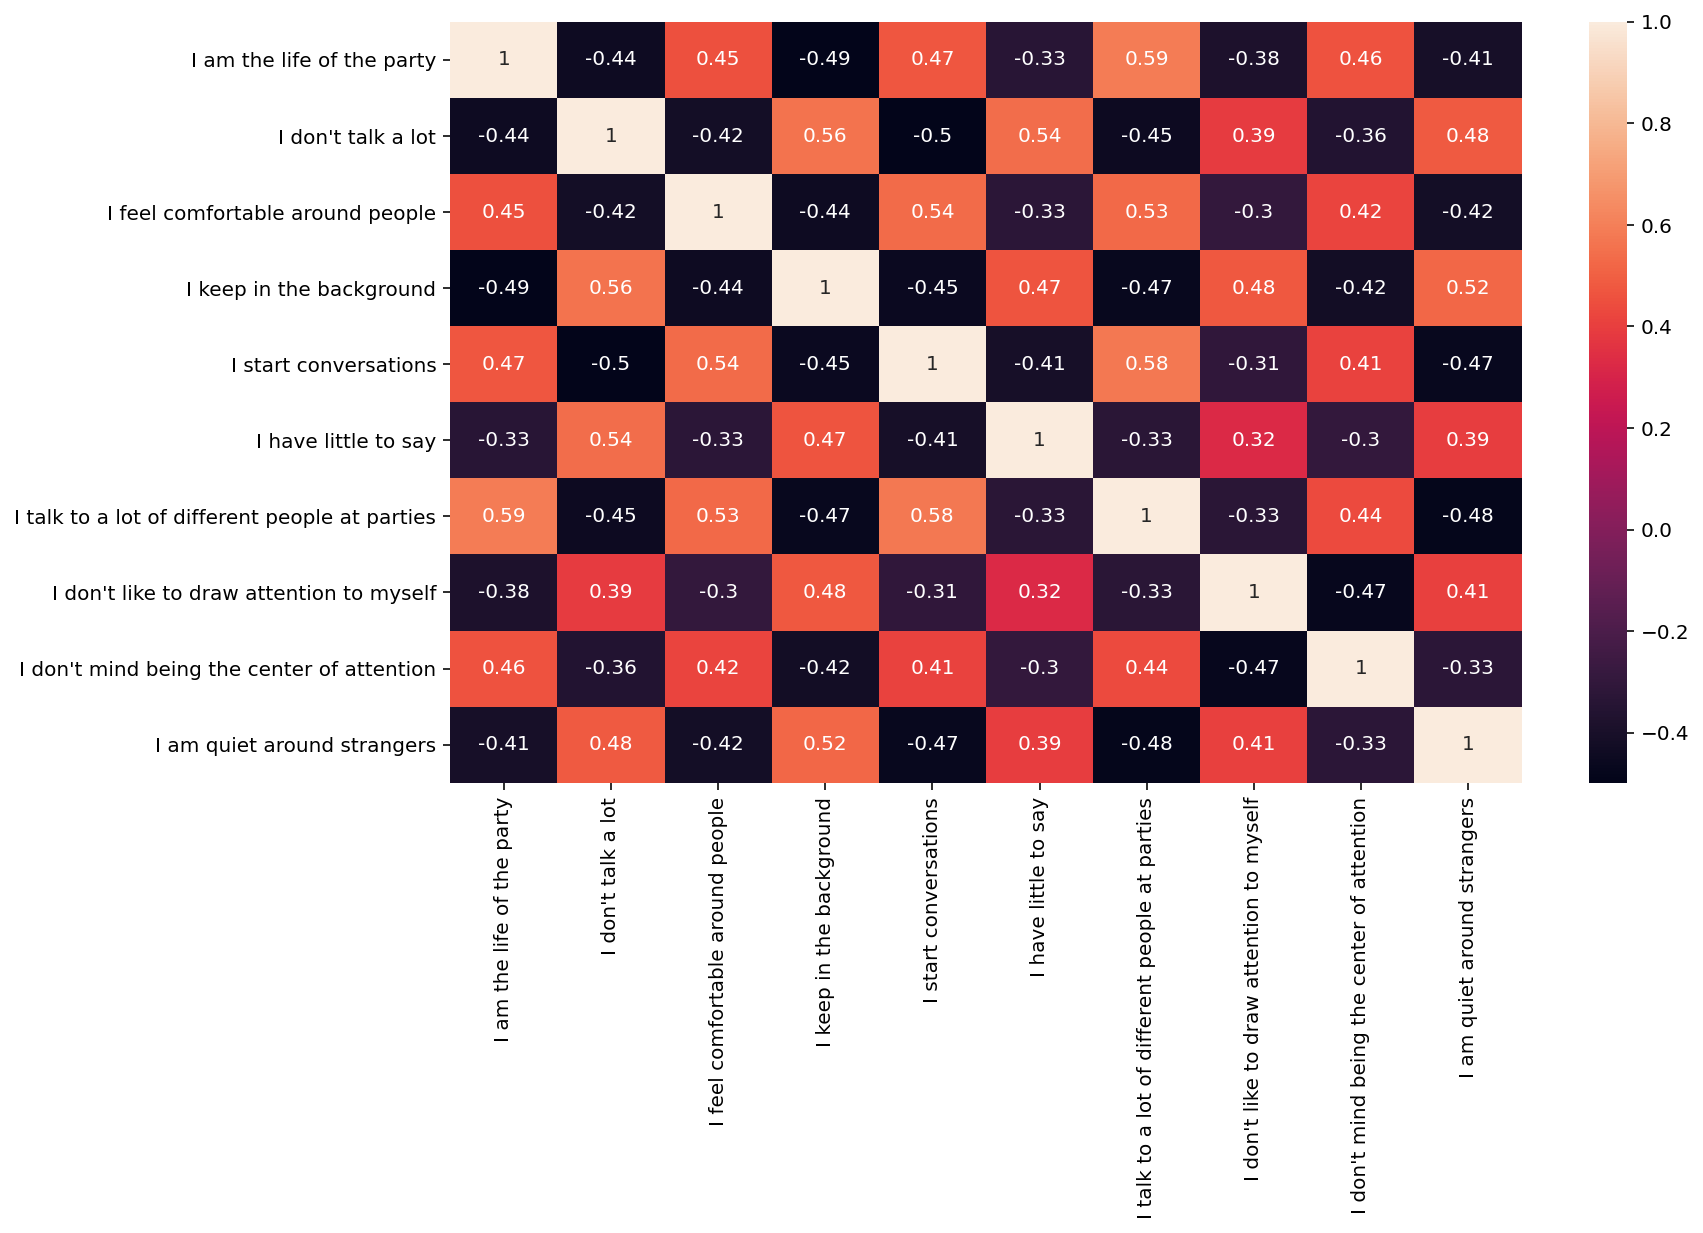

In [51]:
#target_data = data_full.drop(['I feel comfortable around people'], axis=1)
corrMatrix = data_full.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
# Shuffle the data
data = shuffle(data)
occurences = [0, 0, 0, 0, 0, 0]
num_1 = 0
data_df = pd.DataFrame(data, columns =['I feel comfortable around people'])

for x in data_df['I feel comfortable around people']:
    occurences[x] += 1

occurences

[58, 687, 1751, 2686, 2927, 1890]

In [9]:
if False:
    train = train.drop('I have little to say', axis = 1)
    train = train.drop("I don't like to draw attention to myself", axis = 1)
    train = train.drop('I am quiet around strangers', axis = 1)
    train

In [10]:
# Split into train and test
train_data,test_data=train_test_split(data,test_size=0.15)

train_full_data,test_full_data=train_test_split(data_full,test_size=0.15)

In [11]:
data_100k = data_full[0:100000]
train_100k_data, test_100k_data=train_test_split(data_100k,test_size=0.15)

In [38]:
train_y = train_data.iloc[:, 2]
train_x = pd.DataFrame.drop(train_data, columns = 'I feel comfortable around people')

test_y = test_data.iloc[:, 2]
test_x = pd.DataFrame.drop(test_data, columns = 'I feel comfortable around people')
#pca = decomposition.PCA(n_components=1)
#pca.fit(test_x)
#test_x = pca.transform(test_x)

#pca.fit(train_x)
#train_x = pca.transform(train_x)

if False:
    train_y = train_100k_data.iloc[:, 0]
    train_x = train_100k_data.iloc[:, 1:10]

    test_y = test_100k_data.iloc[:, 0]
    test_x = test_100k_data.iloc[:, 1:10]

In [40]:
test_x

,I am the life of the party,I don't talk a lot,I keep in the background,I start conversations,I have little to say,I talk to a lot of different people at parties,I don't like to draw attention to myself,I don't mind being the center of attention,I am quiet around strangers
5470,4,2,2,2,4,5,5,1,4
1691,2,3,3,3,4,3,4,3,4
3168,3,2,2,5,2,2,5,1,2
3643,1,2,3,2,2,2,4,2,4
8216,2,4,4,2,4,1,5,1,5
...,...,...,...,...,...,...,...,...,...
3867,4,4,3,3,3,1,4,4,3
7166,1,3,3,3,3,2,2,3,3
9168,1,5,4,1,5,1,5,1,5
8292,3,2,4,5,1,4,4,1,2


In [41]:
def analyzeAndVisualize(inputList):
    diff = inputList - test_y.to_numpy().T
    total = 0

    num_diff = [0, 0, 0, 0]

    for x in diff:
            total += abs(x)
            if abs(x) == 1:
                num_diff[0] += 1
            elif abs(x) == 2:
                num_diff[1] += 1
            elif abs(x) == 3:
                num_diff[2] += 1
            elif abs(x) == 4:
                num_diff[3] += 1

    #average_diff = total/accuracy_notNormalized
    
    total_wrong = num_diff[0] + num_diff[1] + num_diff[2] + num_diff[3]
    
    print("Number of 1-unit errors: ", num_diff[0])
    print("Number of 2-unit errors: ", num_diff[1])
    print("Number of 3-unit errors: ", num_diff[2])
    print("Number of 4-unit errors: ", num_diff[3])
    #visualization
    x_diff = [1, 2, 3, 4]
    dataframe = pd.DataFrame({'Difference': x_diff, 'Number of occurences':num_diff})
    
    dataframe.plot(x='Difference', y='Number of occurences', kind='bar',figsize=(8,8))
    plt.title("Error distances")
    plt.ylabel('No. of Occurrences', fontsize=12)
    plt.xlabel('Difference of the predicted value from the real value', fontsize=12)
    

In [42]:
# Linear regression
# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

# Linear regression result:
regr_predicted_y = regr.predict(test_x)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, regr_predicted_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, regr_predicted_y))

Mean squared error: 0.88
Coefficient of determination: 0.39


In [43]:
# Lasso regression
elas = ElasticNet(random_state=0)

elas.fit(train_x, train_y)

# Elastic net result:
elas_predicted_y = elas.predict(test_x)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, elas_predicted_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, elas_predicted_y))

Mean squared error: 1.15
Coefficient of determination: 0.21


In [44]:
# Elastic net
lass = linear_model.Lasso(alpha=0.1)

lass.fit(train_x, train_y)

# Linear regression result:
lass_predicted_y = lass.predict(test_x)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, lass_predicted_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, lass_predicted_y))

Mean squared error: 0.89
Coefficient of determination: 0.39


In [45]:
# Naive Bayes
if False:
    gnb = GaussianNB()

    naiveBayes_pred = gnb.fit(train_x, train_y.values.ravel()).predict(test_x)
    print("Naive Bayes")
    print("Accuracy: ", metrics.accuracy_score(test_y, naiveBayes_pred)*100, "%")

    analyzeAndVisualize(naiveBayes_pred)

In [46]:
# Stochastic grad descend
if False:
    stochastic_classifier = SGDClassifier(loss="hinge", penalty="l2")

    stochastic_classifier.fit(train_x, train_y.values.ravel())

    stchastic_pred = stochastic_classifier.predict(test_x)
    print("Stochastic gradient descend")
    print("Accuracy: ", metrics.accuracy_score(test_y, stchastic_pred)*100, "%")
    analyzeAndVisualize(stchastic_pred)

Logistic regression
Accuracy:  46.0 %
Number of 1-unit errors:  642
Number of 2-unit errors:  136
Number of 3-unit errors:  26
Number of 4-unit errors:  6


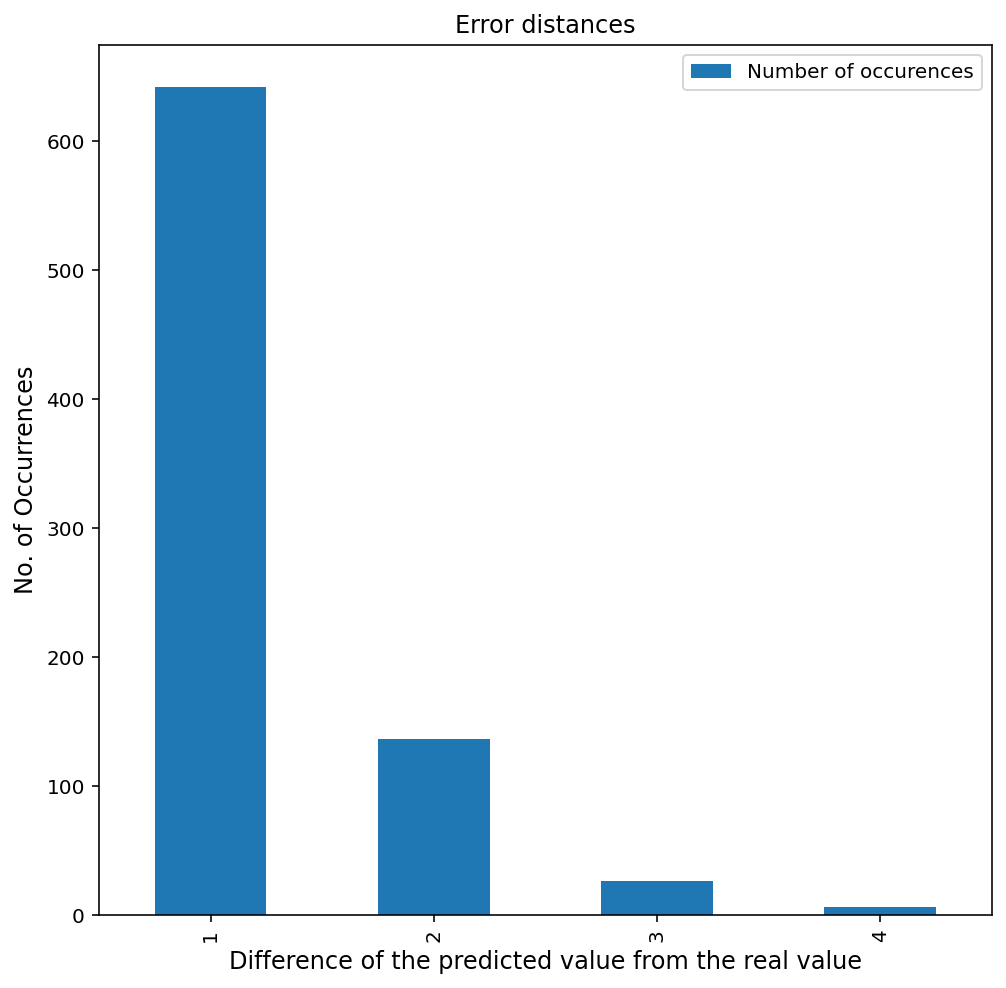

In [47]:
# Logistic reg
log_classifier = LogisticRegression(random_state=0, max_iter=1000, class_weight=None).fit(train_x, train_y.values.ravel())

log_pred = log_classifier.predict(test_x)

print("Logistic regression")
print("Accuracy: ", metrics.accuracy_score(test_y, log_pred, normalize=True)*100, "%")

#print(metrics.confusion_matrix(test_y, log_pred))

analyzeAndVisualize(log_pred)


Support vector machine
Accuracy:  48.199999999999996 %
Number of 1-unit errors:  546
Number of 2-unit errors:  202
Number of 3-unit errors:  21
Number of 4-unit errors:  8


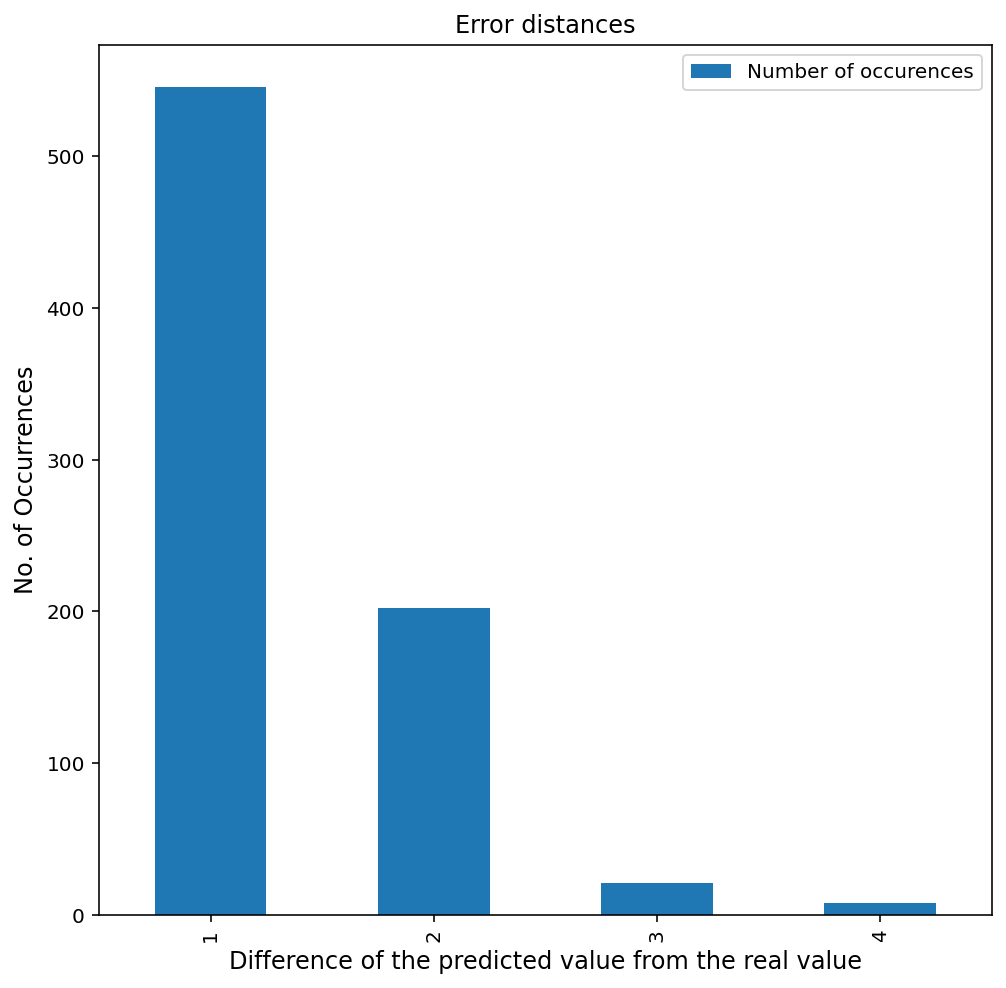

In [24]:
# Support vector machine
svc_calssifier = svm.SVC(max_iter=10000)
svc_calssifier.fit(train_x, train_y.values.ravel())

svc_pred = svc_calssifier.predict(test_x)
print("Support vector machine")
print("Accuracy: ", metrics.accuracy_score(test_y, svc_pred, normalize=True)*100, "%")

analyzeAndVisualize(svc_pred)

In [27]:
# KNN
if False:
    knn_classifier = KNeighborsClassifier(n_neighbors=20)
    knn_classifier.fit(train_x, train_y.values.ravel())

    knn_pred = knn_classifier.predict(test_x)
    print("K Nearest Neighbors")
    print("Accuracy: ", metrics.accuracy_score(test_y, knn_pred, normalize=True)*100, "%")

    analyzeAndVisualize(knn_pred)

In [28]:
# Decision tree
if False:
    decisionTree_cl = tree.DecisionTreeClassifier()

    decisionTree_cl.fit(train_x, train_y.values.ravel())

    dt_pred = decisionTree_cl.predict(test_x)
    print("Decision tree")
    print("Accuracy: ", metrics.accuracy_score(test_y, dt_pred, normalize=True)*100, "%")

    analyzeAndVisualize(dt_pred)

Multi layer perceptron
Accuracy:  46.13333333333333 %
Number of 1-unit errors:  539
Number of 2-unit errors:  228
Number of 3-unit errors:  32
Number of 4-unit errors:  9


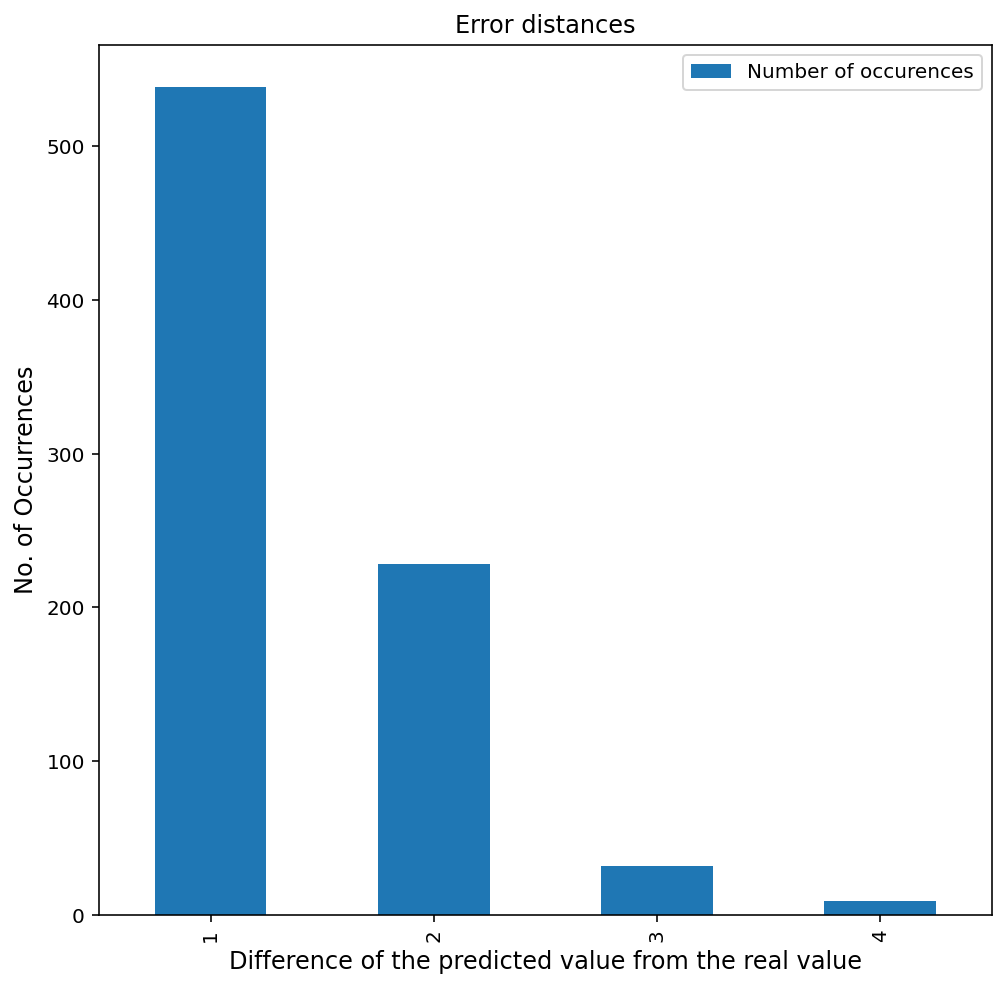

In [29]:
# Neural network multi layer perceptron
mlp_cl = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, max_iter = 1000)
mlp_cl.fit(train_x, train_y)

nlp_pred = mlp_cl.predict(test_x)
print("Multi layer perceptron")
print("Accuracy: ", metrics.accuracy_score(test_y, nlp_pred, normalize=True)*100, "%")

analyzeAndVisualize(nlp_pred)